Look at VG, etc., over time under the Tennessen et al. demographic model for Europeans.

In [1]:
%matplotlib inline
import pandas as pd
from tennessen import get_nlist
import matplotlib
import matplotlib.pyplot as plt

/data/apps/user_contributed_software/krthornt/python/2.7.10/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
N=get_nlist()

In [3]:
len(N)

79020

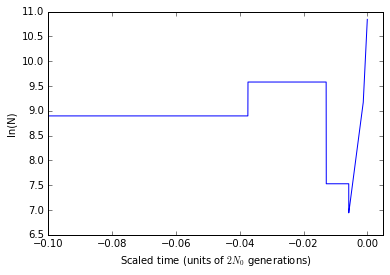

In [4]:
import numpy as np
generation=np.array(range(len(N)))
generation+=1
scaled_time = (generation-generation.max())/(2.0*generation.max())
plt.plot(scaled_time[8*N[0]+1:],np.log(N[8*N[0]+1:]))
plt.xlabel(r'Scaled time (units of '+r'$2N_0$'+" generations)")
plt.ylabel("ln(N)")
plt.xlim(-0.1,0.005)
logN=np.log(N)

In [5]:
import glob

In [6]:
L=[0.025, 0.05, 0.1, 0.25, 0.5]
H=[0,0.1,0.25,1]

In [7]:
#First, we're going to take all the raw input data
#and make a smaller summary file.  This will make plotting 
#much faster...
#These summaries are based on MEDIAN values
import os.path
if os.path.isfile('statsummary.h5') is False:
    out=pd.HDFStore('statsummary.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.stats.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).median()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

In [8]:
##Now, do summarizing based on the MEAN
if os.path.isfile('statsummaryMean.h5') is False:
    out=pd.HDFStore('statsummaryMean.h5',complevel=6,complib='zlib')
    for l in L:
        files=glob.glob('gbr.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['g']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        files=glob.glob('additive.lambda'+str(l)+'*stats*.h5')
        for f in files:
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['a']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[1.0]*len(xgt.index)
            out.append('statsumm',xgt)
        for h in H:
            f='multi.lambda'+str(l)+'.stats.h'+str(h)+'.h5'
            x=pd.read_hdf(f)
            xg=x.groupby(['stat','generation']).mean()
            xg.reset_index(inplace=True)
            xgt=xg[xg.generation > 8*N[0]]
            xgt['model']=['m']*len(xgt.index)
            xgt['e']=[l]*len(xgt.index)
            xgt['h']=[float(h)]*len(xgt.index)
            out.append('statsumm',xgt)
    out.close()

In [9]:
s=pd.read_hdf('statsummaryMean.h5')
NoverTime=[]
for i in range(len(s.index)):
    g=s.generation.iloc[i]
    NoverTime.append(logN[g-1])
s['logN']=NoverTime
print(s.logN.max())

10.843494811


  stat  generation     value    rep model      e    h      logN  scaled_time
0   VE       58500  0.005625  511.5     g  0.025  1.0  8.896999    -0.200391
1   VE       58550  0.005626  511.5     g  0.025  1.0  8.896999    -0.199902
2   VE       58600  0.005629  511.5     g  0.025  1.0  8.896999    -0.199414
3   VE       58650  0.005626  511.5     g  0.025  1.0  8.896999    -0.198926
4   VE       58700  0.005620  511.5     g  0.025  1.0  8.896999    -0.198437


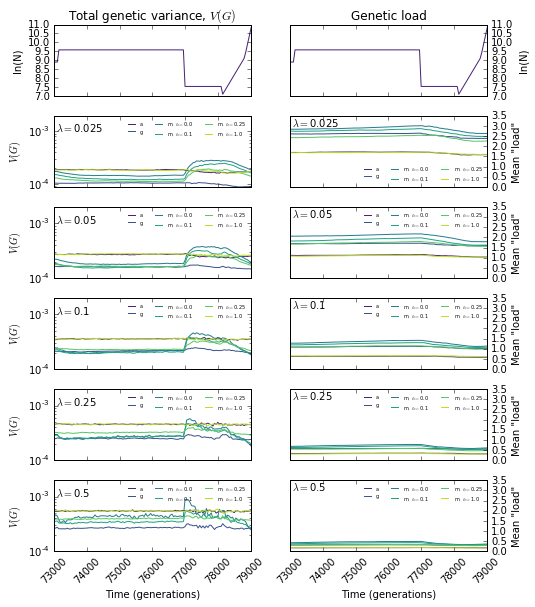

In [22]:
fig=plt.figure(figsize=(7.5,8.5))
#s=pd.read_hdf('statsummaryMean.h5')
s['scaled_time']=(s.generation-s.generation.max())/(2.0*N.max())
print s.head()
A=[]
B=[]
A.append(plt.subplot2grid((6,2),(0,0),colspan=1,rowspan=1))
B.append(plt.subplot2grid((6,2),(0,1),colspan=1,rowspan=1))
for i in range(len(L)):
    A.append(plt.subplot2grid((6,2),(i+1,0),colspan=1,rowspan=1))
    B.append(plt.subplot2grid((6,2),(i+1,1),colspan=1,rowspan=1))
FIRST=False
COLORS = [plt.cm.viridis(x) for x in np.linspace(0.1,0.9, 6)]
CI=0
#for m in sorted(s.model.unique()):
for i in range(len(L)):
    CI=0
    for m in sorted(s.model.unique()):
#    for i in range(len(L)):
        l=L[i]
        #print m,l
        #print(i)
        if m!='m':
            si=s[(s.model==m)&(s.e==l)]
            #print si.head()
            if i==0 and FIRST is False:
                A[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                B[0].plot(si.generation[si.stat=='VG'],si.logN[si.stat=='VG'],color=COLORS[CI])
                FIRST = True
            A[i+1].semilogy(si.generation[si.stat=='VG'],si.value[si.stat=='VG'],label=m,color=COLORS[CI])
            B[i+1].plot(si.generation[si.stat=='mload'],si.value[si.stat=='mload'],label=m,color=COLORS[CI])
            CI+=1
        else:
            for h in sorted(H):
                #print h
                si=s[(s.model==m)&(s.e==l)&(s.h==h)]
                A[i+1].semilogy(si.generation[si.stat=='VG'],
                          si.value[si.stat=='VG'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                B[i+1].plot(si.generation[si.stat=='mload'],
                          si.value[si.stat=='mload'],label=m+r', $h = $'+'{0:0.3}'.format(float(h)),color=COLORS[CI])
                CI+=1
        #print CI,len(COLORS)
        if CI==len(COLORS)-1:
            CI=0
#Axis details, etc.
for i in B:
    i.set_xlim(73000,79019)
    #i.set_xlim(-0.03,0.001)
    i.yaxis.tick_right()
    i.yaxis.set_label_position('right')
for i in A:
    #i.set_xlim(-0.03,0.001)
    i.set_xlim(73000,79019)
for i in range(1,len(A)):
    A[i].set_ylim(0.0,2e-3)
    A[i].yaxis.set_ticks([1e-4,1e-3])
    A[i].text(73050,1e-3,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    A[i].set_ylabel(r'$V(G)$')
for i in range(1,len(B)):
    B[i].set_ylim(0.0,3.5)
    B[i].text(73050,3.0,r'$\lambda = $'+'{0:0.2}'.format(L[i-1]))
    B[i].set_ylabel(r'Mean "load"')
for i in range(len(A)-1):
    plt.setp(A[i].get_xticklabels(),visible=False)
    plt.setp(B[i].get_xticklabels(),visible=False)
    
A[0].set_title("Total genetic variance, "+r'$V(G)$')
B[0].set_title("Genetic load")
A[len(A)-1].set_xlabel("Time (generations)")
plt.setp(A[len(A)-1].get_xticklabels(),rotation=45)
B[len(B)-1].set_xlabel("Time (generations)")
plt.setp(B[len(B)-1].get_xticklabels(),rotation=45)
A[0].set_ylabel("ln(N)")
B[0].set_ylabel("ln(N)")
for i in range(1,len(A)):
    A[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
B[1].legend(loc='lower right',prop={'size':5},ncol=3,frameon=False)
for i in range(2,len(B)):
    B[i].legend(loc='upper right',prop={'size':5},ncol=3,frameon=False)
plt.tight_layout()
plt.show()
fig.savefig('TennessenStats.tif',dpi=600)

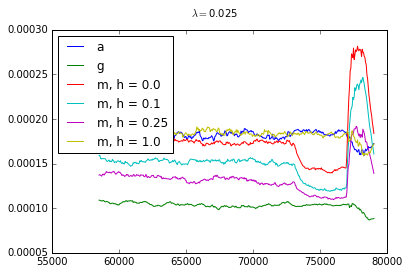

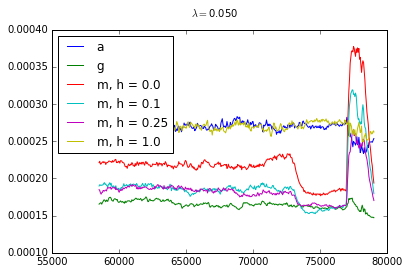

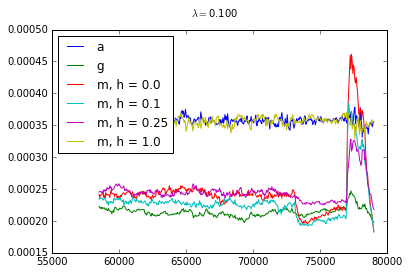

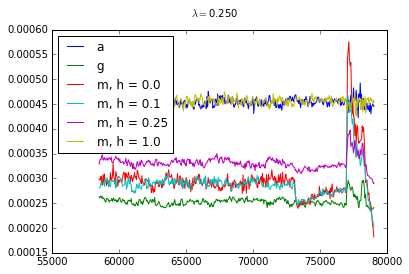

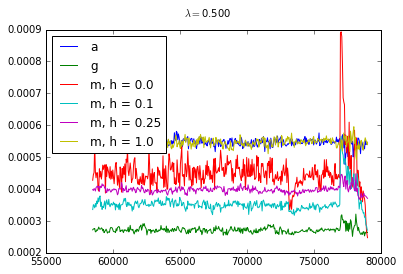

In [19]:
#Now, do some actual plotting
s=pd.read_hdf('statsummaryMean.h5')
for e in s.e.unique():
    fig=plt.figure()
    for m in sorted(s.model.unique()):
        if m != 'm':
            si=s[(s.model==m)&(s.e==e)]
            plt.plot(si.generation[si.stat=='VG'],si.value[si.stat=='VG'],label=m)
        else:
            for h in sorted(s.h.unique()):
                si=s[(s.model==m)&(s.e==e)&(s.h==h)]
                plt.plot(si.generation[si.stat=='VG'],si.value[si.stat=='VG'],label=m+', h = '+'{0:0.3}'.format(h))
    plt.legend(loc='upper left')
    plt.suptitle(r'$\lambda =$'+'{0:0.3f}'.format(e))
    plt.show()

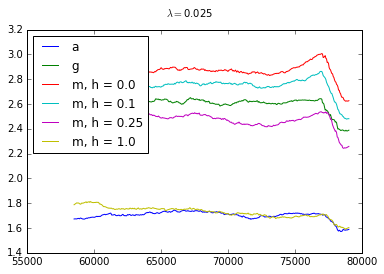

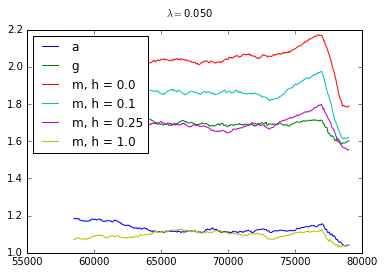

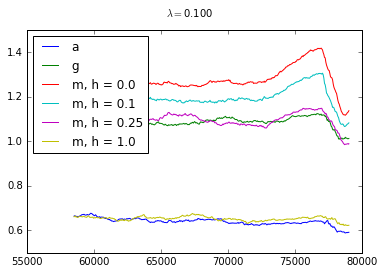

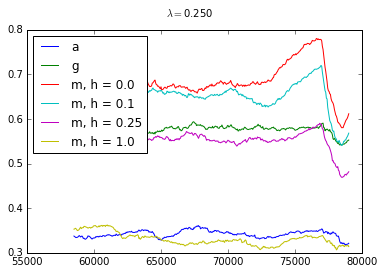

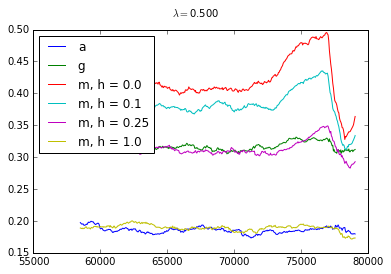

In [25]:
#Genetic load
for e in s.e.unique():
    fig=plt.figure()
    for m in sorted(s.model.unique()):
        if m != 'm':
            si=s[(s.model==m)&(s.e==e)]
            plt.plot(si.generation[si.stat=='mload'],si.value[si.stat=='mload'],label=m)
        else:
            for h in sorted(s.h.unique()):
                si=s[(s.model==m)&(s.e==e)&(s.h==h)]
                plt.plot(si.generation[si.stat=='mload'],si.value[si.stat=='mload'],label=m+', h = '+'{0:0.3}'.format(h))
    plt.legend(loc='upper left')
    plt.suptitle(r'$\lambda =$'+'{0:0.3f}'.format(e))
    plt.show()